In [ ]:
!python --version

In [ ]:
# !pip install pyarrow
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data =pd.read_parquet("data/yellow_tripdata_2022-01.parquet", engine='pyarrow')

In [ ]:
data.head(5)

In [ ]:
count = 0
cols = []
for columns in data.columns:
    count += 1
    cols.append(columns)
print(len(cols))
print(count)
# Read the data for January. How many columns are there? 19

In [ ]:
tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)

In [ ]:
# data[data.trip_type == 2]
data["duration"] = data["tpep_dropoff_datetime"]- data["tpep_pickup_datetime"]

# data[]

In [ ]:
data["duration"] = data["duration"].apply(lambda td: td.total_seconds()/60)

In [ ]:
# td = data.duration.iloc[0]
# td.total_seconds()/60
# What's the standard deviation of the trips duration in January? 46.45
data["duration"].std()

In [ ]:
data["duration"].nlargest(n=5)

In [ ]:
data["duration"].nsmallest(n=5)

In [ ]:
sns.distplot(data.duration)

In [ ]:
data["duration"].describe(percentiles=[0.95, 0.98, 0.99])

In [ ]:
# What fraction of the records left after you dropped the outliers? 98%
((data["duration"] >= 1) & (data["duration"] <= 60)).mean()

In [ ]:
data  = data[(data["duration"] >= 1) & (data["duration"] <= 60)]

In [ ]:
data


In [ ]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ['trip_distance']

In [ ]:
data[categorical].dtypes

In [ ]:
data[categorical] = data[categorical].astype(str)

In [ ]:
data[categorical].dtypes

In [ ]:
data["PULocationID"].unique()


In [ ]:
train_dicts = data[categorical].to_dict(orient='records')

In [ ]:
len(train_dicts)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)

In [ ]:
x_train

In [ ]:
# What's the dimensionality of this matrix (number of columns)? 515
print(len(dv.feature_names_))

In [ ]:
target = 'duration'
y_train = data[target].values

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
# y_pred = lr.predict(x_train)

In [ ]:
sns.distplot(y_pred, label="Predictions")
sns.distplot(y_train, label="Actuals")

plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred, squared=False)
# What's the RMSE on train? 6.99

In [32]:
data_val = pd.read_parquet("data/yellow_tripdata_2022-02.parquet", engine='pyarrow')

In [33]:
data_val["duration"] = data_val["tpep_dropoff_datetime"]- data_val["tpep_pickup_datetime"]

data_val["duration"] = data_val["duration"].apply(lambda td: td.total_seconds()/60)

In [34]:
data_val  = data_val[(data_val["duration"] >= 1) & (data_val["duration"] <= 60)]

In [35]:
categorical = ["PULocationID", "DOLocationID"]
data_val[categorical] = data_val[categorical].astype(str)
test_dicts = data_val[categorical].to_dict(orient='records')
x_test = dv.transform(test_dicts)


In [36]:
print(len(dv.feature_names_))

515


In [37]:
target = 'duration'
y_test = data_val[target].values

In [40]:
y_pred = lr.predict(x_test)

In [41]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred, squared=False)
# What's the RMSE on train? 6.99

7.7864132069521945

/tmp/ipykernel_11083/1384114014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predictions")
/tmp/ipykernel_11083/1384114014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actuals")


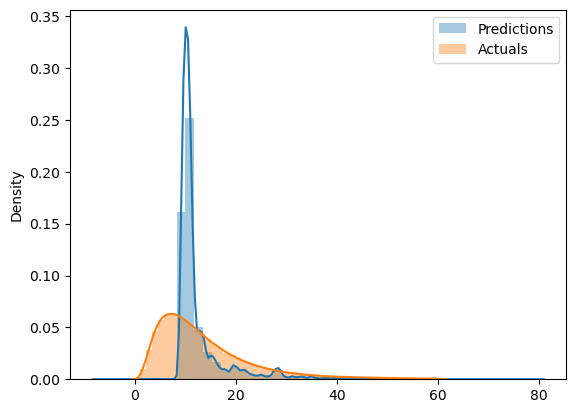

In [42]:
sns.distplot(y_pred, label="Predictions")
sns.distplot(y_test, label="Actuals")

plt.legend()